# <font color='brown'>楼 + 机器学习实战</font>

# 挑战--使用策略梯度训练 CartPole

## 挑战介绍

本次挑战将在实验楼桌面环境中可视化 CartPole 游戏进行策略梯度强化学习的过程。

## 挑战知识点

- 策略梯度
- 策略梯度定理
- Monte-Carlo 策略梯度算法
- Actor-Critic 策略梯度

---

## 挑战内容

上一个实验中，我们了解并实现了策略梯度算法。同时，使用 OpenAI 提供的 Gym 强化学习环境测试了算法。不过，受限于 Notebook 实验环境，我们无法可视化强化学习的过程，只能打印出学习参数和每个 Episode 学习的时间步长。

本次挑战，我们将利用实验楼提供的桌面在线环境，完成 CartPole 小游戏可视化学习过程。

### Gym 环境安装

首先，需要在桌面环境中安装 Gym 强化学习环境。安装步骤如下：

安装依赖：

```bash
sudo apt-get update
sudo apt-get install cmake
sudo apt-get install swig
```

安装 Gym：

```bash
sudo pip3 install gym[all]
```

**整个安装过程将持续 10 分钟左右，请耐心等待。**

### 使用策略梯度训练 CartPole

**<font color='red'>挑战</font>**：参考「基于策略的强化学习方法」实验内容，尝试通过 Monte-Carlo 策略梯度算法训练 `CartPole-v1` 游戏。

**<font color='blue'>规定</font>**：将代码写入 `mc_cartpole.py`，并放入 `/home/shiyanlou/Code` 路径下方。

In [ ]:
import gym
import numpy as np

def mc_policy_gradient(env, theta, lr, episodes):
    for episode in range(episodes):  # 迭代 episode
        episode = []
        start_observation = env.reset()  # 初始化环境
        t = 0
        while True:
            env.render()  # notebook 不支持渲染环境
            policy = np.dot(theta, start_observation)  # 计算策略值
            # 这里的 action_space 为 2, 故使用 Sigmoid 激活函数处理策略值
            pi = 1 / (1 + np.exp(-policy))
            if pi >= 0.5:
                action = 1  # 向右施加力
            else:
                action = 0  # 向左施加力
            next_observation, reward, done, _ = env.step(action)  # 执行动作
            # 将环境返回结果添加到 episode 中
            episode.append([next_observation, action, pi, reward])
            start_observation = next_observation  # 将返回 observation 作为下一次迭代 observation
            t += 1
            if done:
                print("Episode finished after {} timesteps".format(t))
                break
        # 根据上一次 episode 更新参数 theta
        for timestep in episode:
            observation, action, pi, reward = timestep
            theta += lr * (1 - pi) * np.transpose(-observation) * reward
    
    return theta


if __name__ == '__main__':
    lr = 0.005
    theta = np.random.rand(4)
    episodes=10
    env = gym.make('CartPole-v1')
    mc_policy_gradient(env, theta, lr, episodes)

**期望输出：**

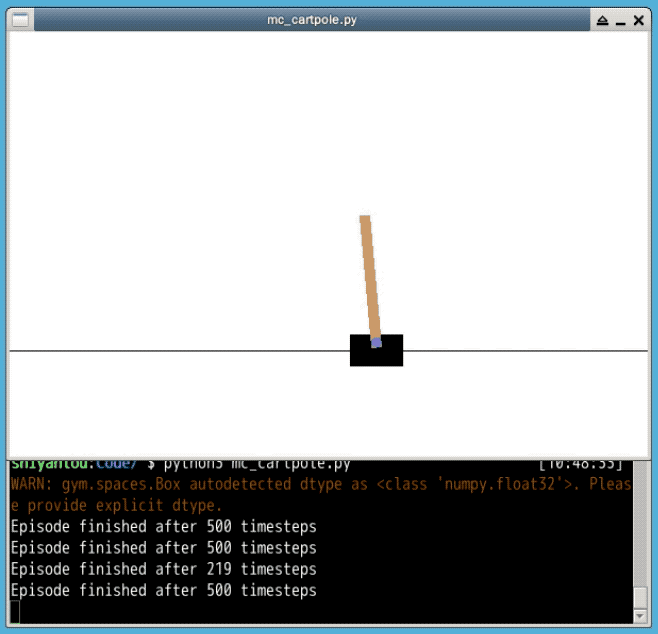

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>